In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading dataset
df = pd.read_excel('new dataset.xlsx')


In [ ]:
print(df.head())


   Player ID  Position  Front Goals  Penalty Strokes  Penalty Corners  \
0       1658         1            5                0                0   
1       5681         3            4                1                4   
2       1435         1            3                2                2   
3       4439         3            1                2                0   
4       1153         1            3                2                1   

   Green Cards  Yellow Cards  Red Cards  Goal Time  Card Issue Time  \
0            1             1          1         68               28   
1            0             0          1         27               12   
2            0             1          0         51               32   
3            1             1          0         28               65   
4            2             1          0         54               47   

   Skill Accuracy  Performance  Score  
0              68            58.83087  
1              78            67.21478  
2             

In [ ]:
print(df.describe())


         Player ID   Position  Front Goals  Penalty Strokes  Penalty Corners  \
count   799.000000  799.00000   799.000000       799.000000       799.000000   
mean   5385.390488    1.95995     3.042553         1.466834         2.501877   
std    2578.811909    0.82316     1.405571         1.123273         1.715968   
min    1020.000000    1.00000     1.000000         0.000000         0.000000   
25%    3172.000000    1.00000     2.000000         0.000000         1.000000   
50%    5338.000000    2.00000     3.000000         1.000000         3.000000   
75%    7626.500000    3.00000     4.000000         2.000000         4.000000   
max    9977.000000    3.00000     5.000000         3.000000         5.000000   

       Green Cards  Yellow Cards   Red Cards   Goal Time  Card Issue Time  \
count   799.000000    799.000000  799.000000  799.000000       799.000000   
mean      0.978723      0.525657    0.486859   30.032541        30.544431   
std       0.821575      0.499654    0.500140   1

In [ ]:
print(df.isnull().sum())


Player ID             0
Position              0
Front Goals           0
Penalty Strokes       0
Penalty Corners       0
Green Cards           0
Yellow Cards          0
Red Cards             0
Goal Time             0
Card Issue Time       0
Skill Accuracy        0
Performance  Score    0
dtype: int64


In [ ]:
import pandas as pd

# Z-score Normalization function
def z_score_normalize(df):
    return (df - df.mean()) / df.std()


# Apply Z-score normalization to all numeric columns
normalized_df = z_score_normalize(df.select_dtypes(include='number'))

# Display the first few rows of the normalized dataset
print("Normalized Dataset (Z-score):")
print(normalized_df.head())




Normalized Dataset (Z-score):
   Player ID  Position  Front Goals  Penalty Strokes  Penalty Corners  \
0  -1.445391 -1.166177     1.392634        -1.305856        -1.457998   
1   0.114630  1.263485     0.681180        -0.415601         0.873048   
2  -1.531865 -1.166177    -0.030275         0.474654        -0.292475   
3  -0.366987  1.263485    -1.453184         0.474654        -1.457998   
4  -1.641217 -1.166177    -0.030275         0.474654        -0.875236   

   Green Cards  Yellow Cards  Red Cards  Goal Time  Card Issue Time  \
0     0.025897      0.949343   1.025995   2.009475        -0.132090   
1    -1.191277     -1.052042   1.025995  -0.160501        -0.962701   
2    -1.191277      0.949343  -0.973444   1.109729         0.075563   
3     0.025897      0.949343  -0.973444  -0.107575         1.788699   
4     1.243072      0.949343  -0.973444   1.268508         0.854261   

   Skill Accuracy  Performance  Score  
0       -0.795125           -0.703419  
1        0.329906       

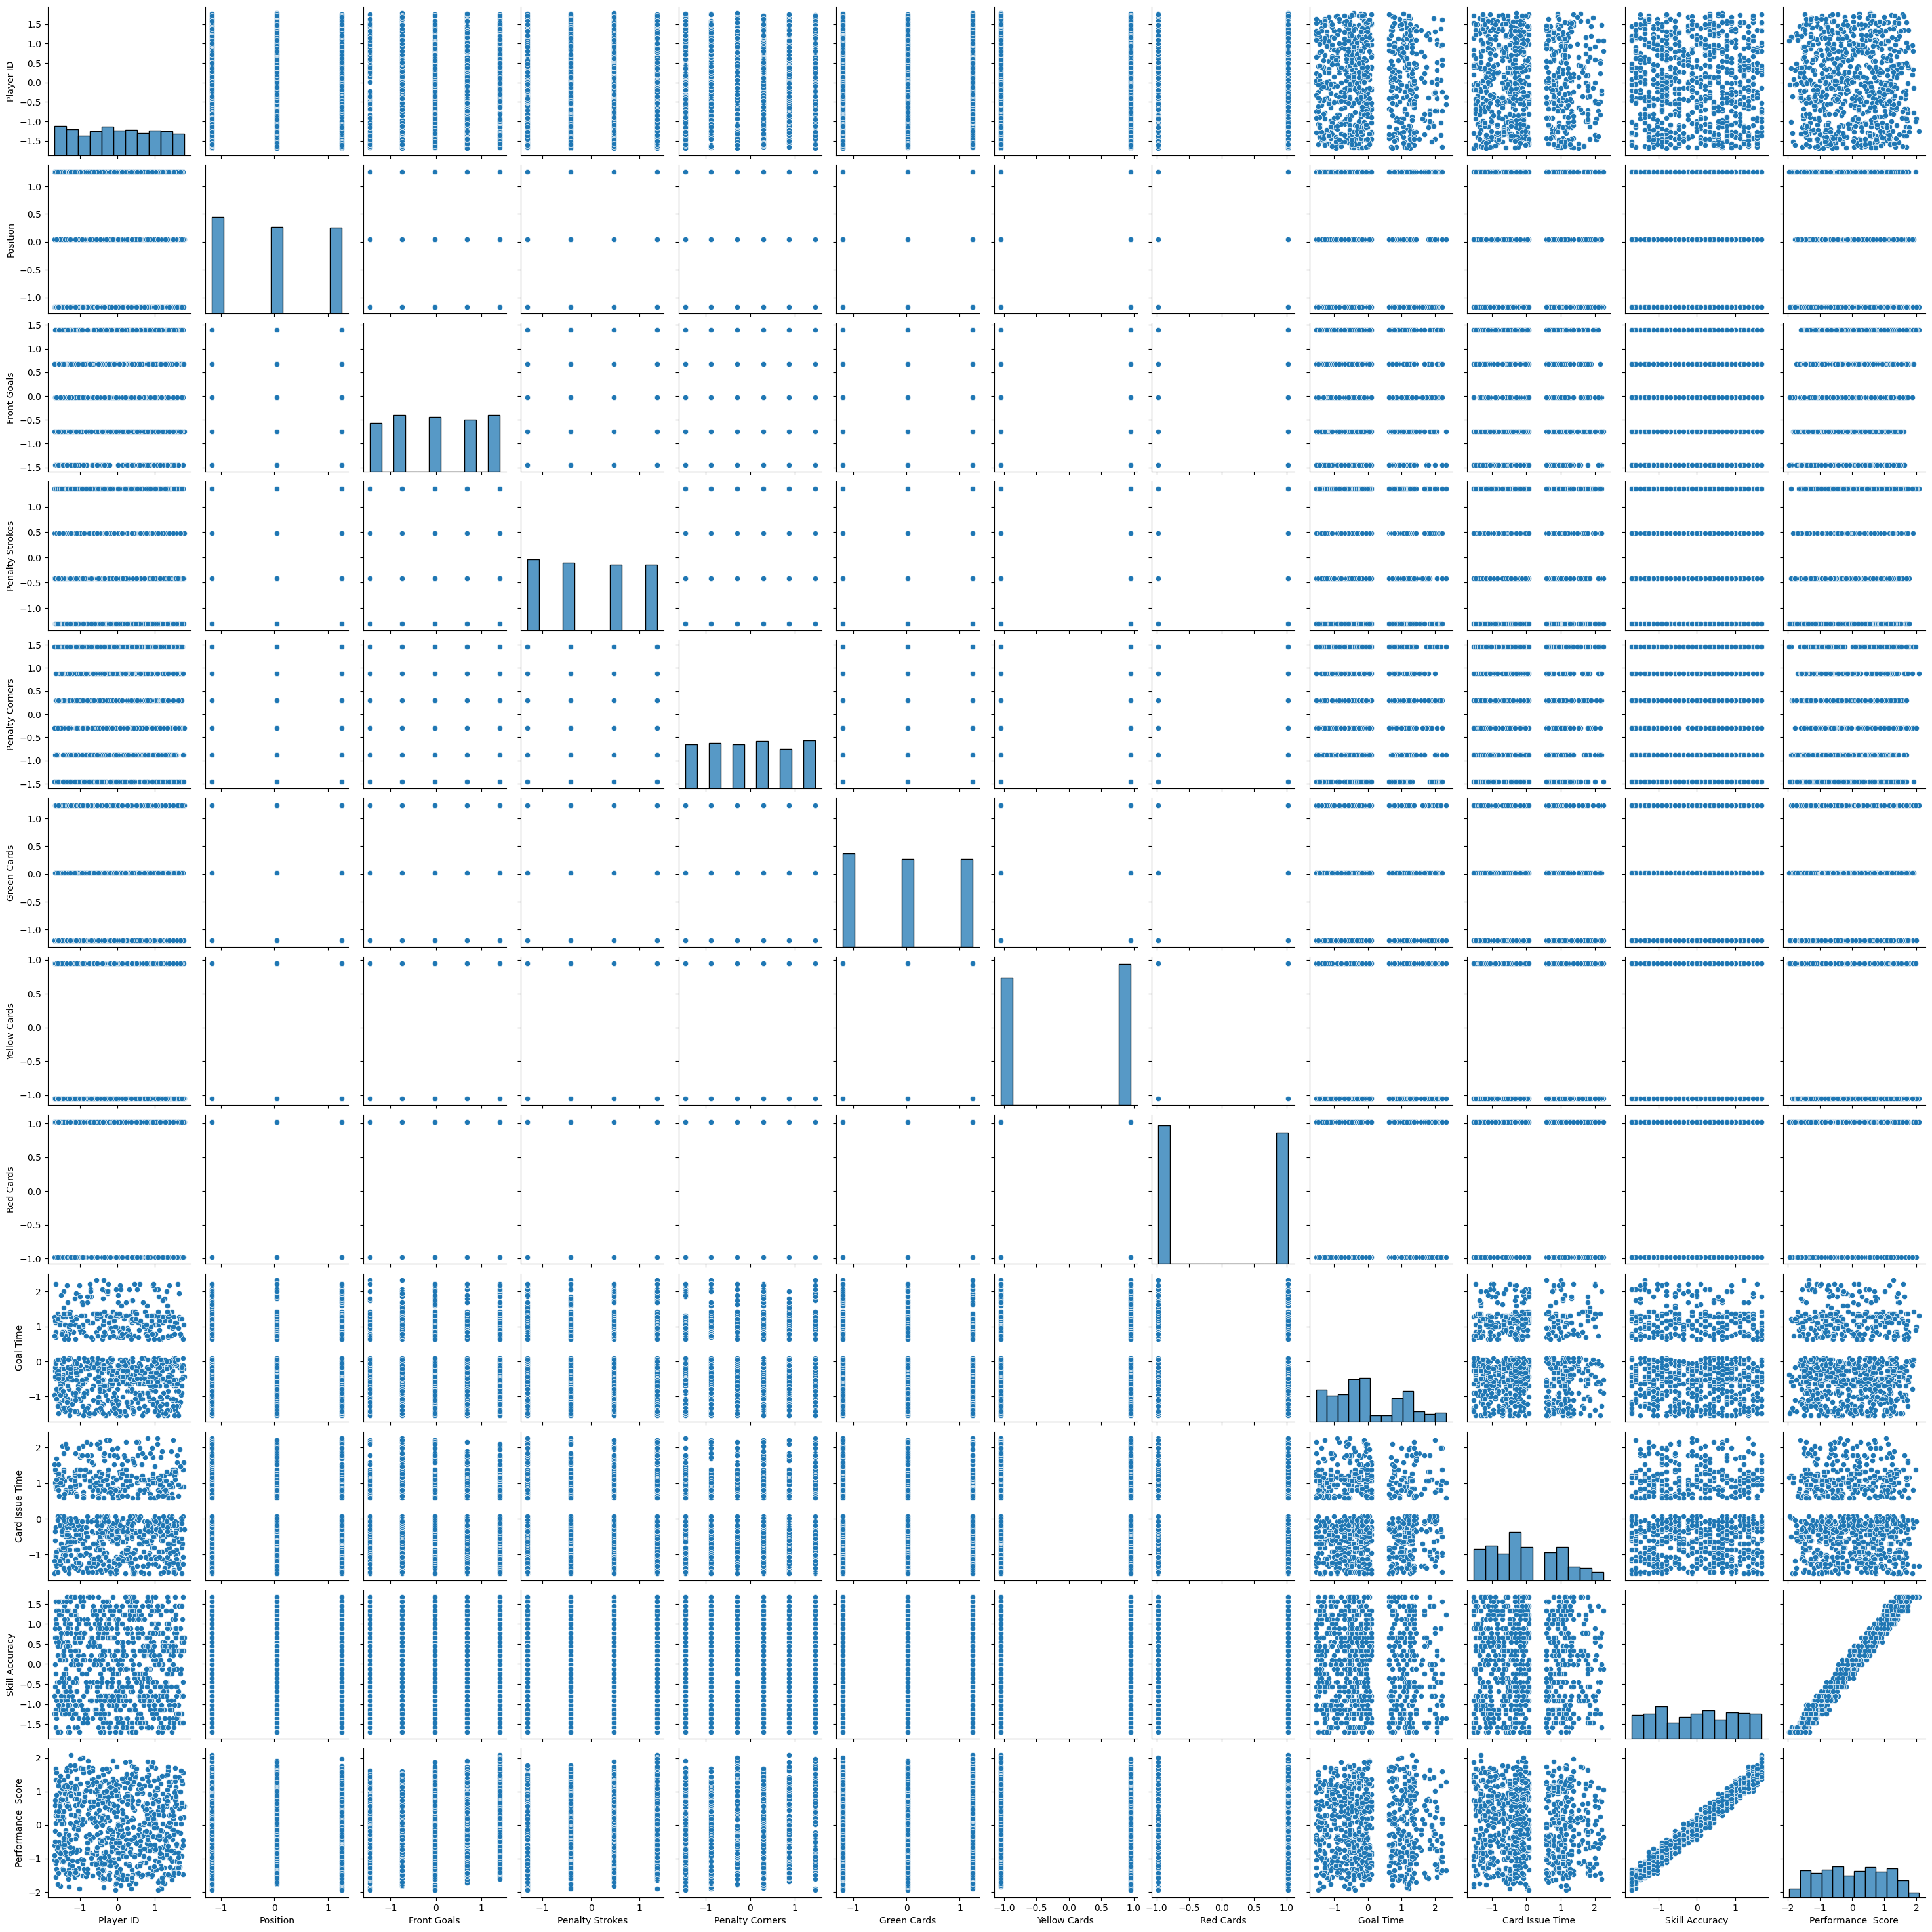

In [ ]:
sns.pairplot(normalized_df)
plt.show()


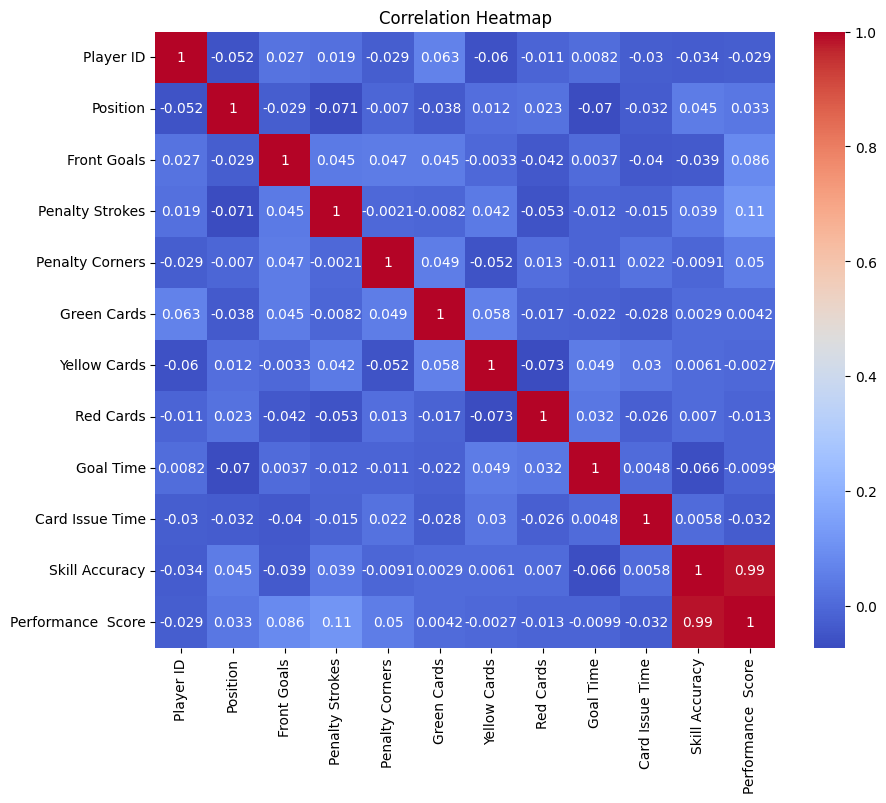

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


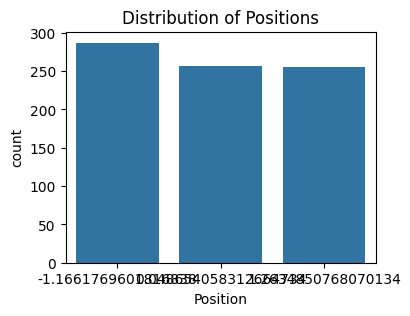

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Position', data=normalized_df)
plt.title('Distribution of Positions')
plt.show()


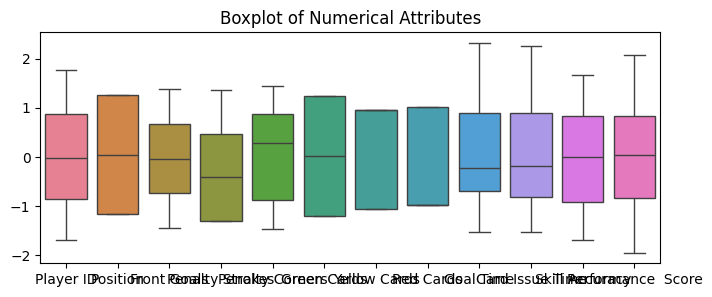

In [ ]:
plt.figure(figsize=(8, 3))

sns.boxplot(data=normalized_df)
plt.title('Boxplot of Numerical Attributes')
plt.show()

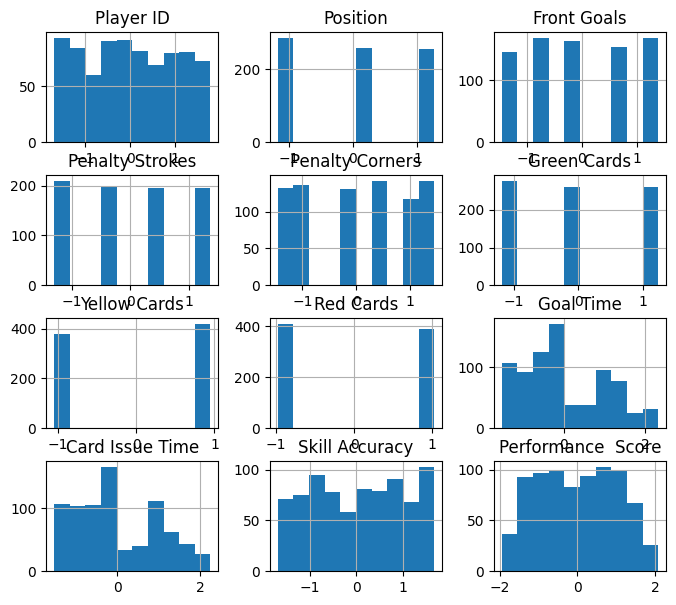

In [ ]:
normalized_df.hist(figsize=(8, 7))
plt.show()


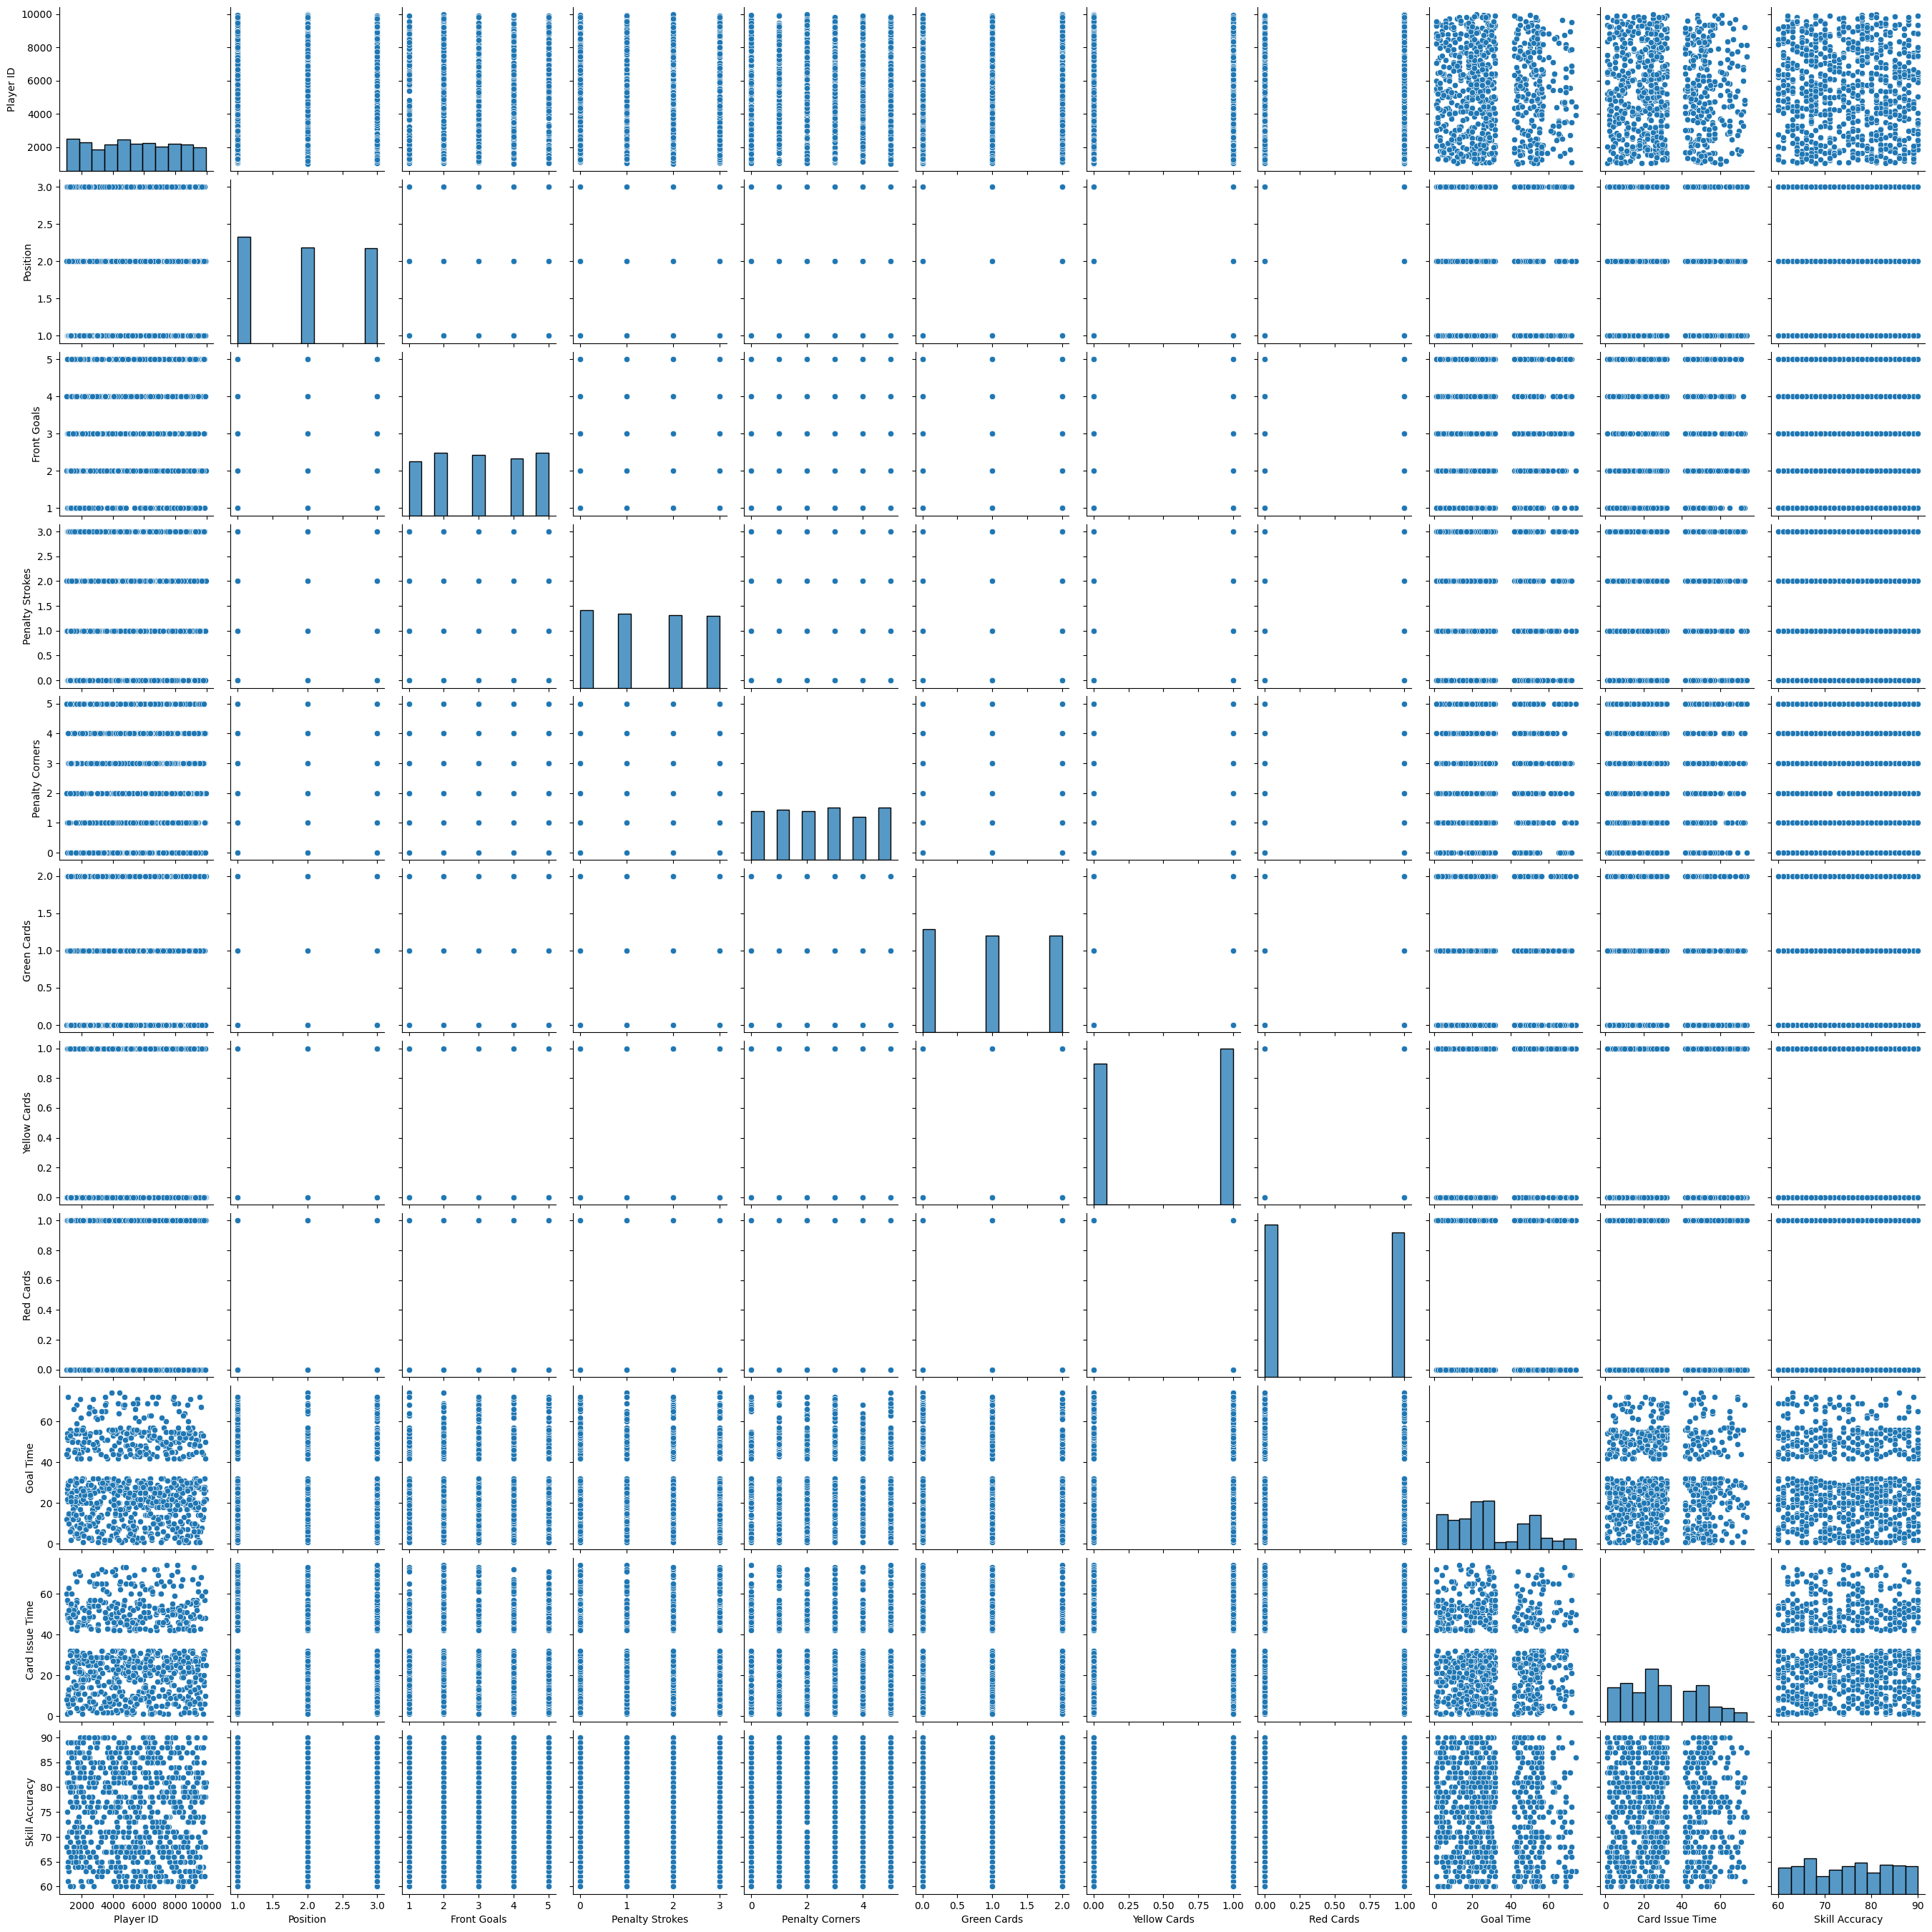

In [ ]:
# Create pairwise scatter plots to visualize relationships between pairs of attributes
sns.pairplot(df)
plt.show()


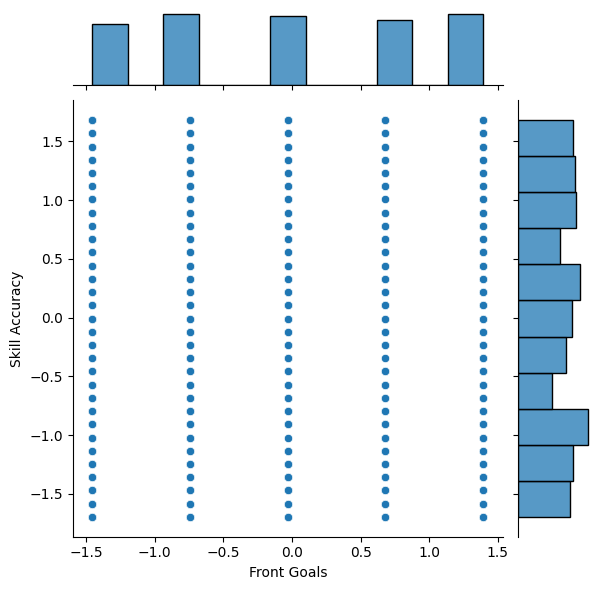

In [ ]:
# Create joint distribution plots to visualize the relationship between two numeric variables
sns.jointplot(x='Front Goals', y='Skill Accuracy', data=normalized_df, kind='scatter')
plt.show()


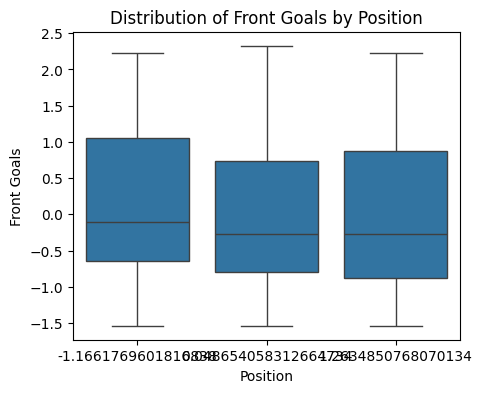

In [ ]:
# Create boxplots to compare the distribution of attributes across different positions
plt.figure(figsize=(5, 4))
sns.boxplot(x='Position', y='Goal Time', data=normalized_df)
plt.xlabel('Position')
plt.ylabel('Front Goals')
plt.title('Distribution of Front Goals by Position')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


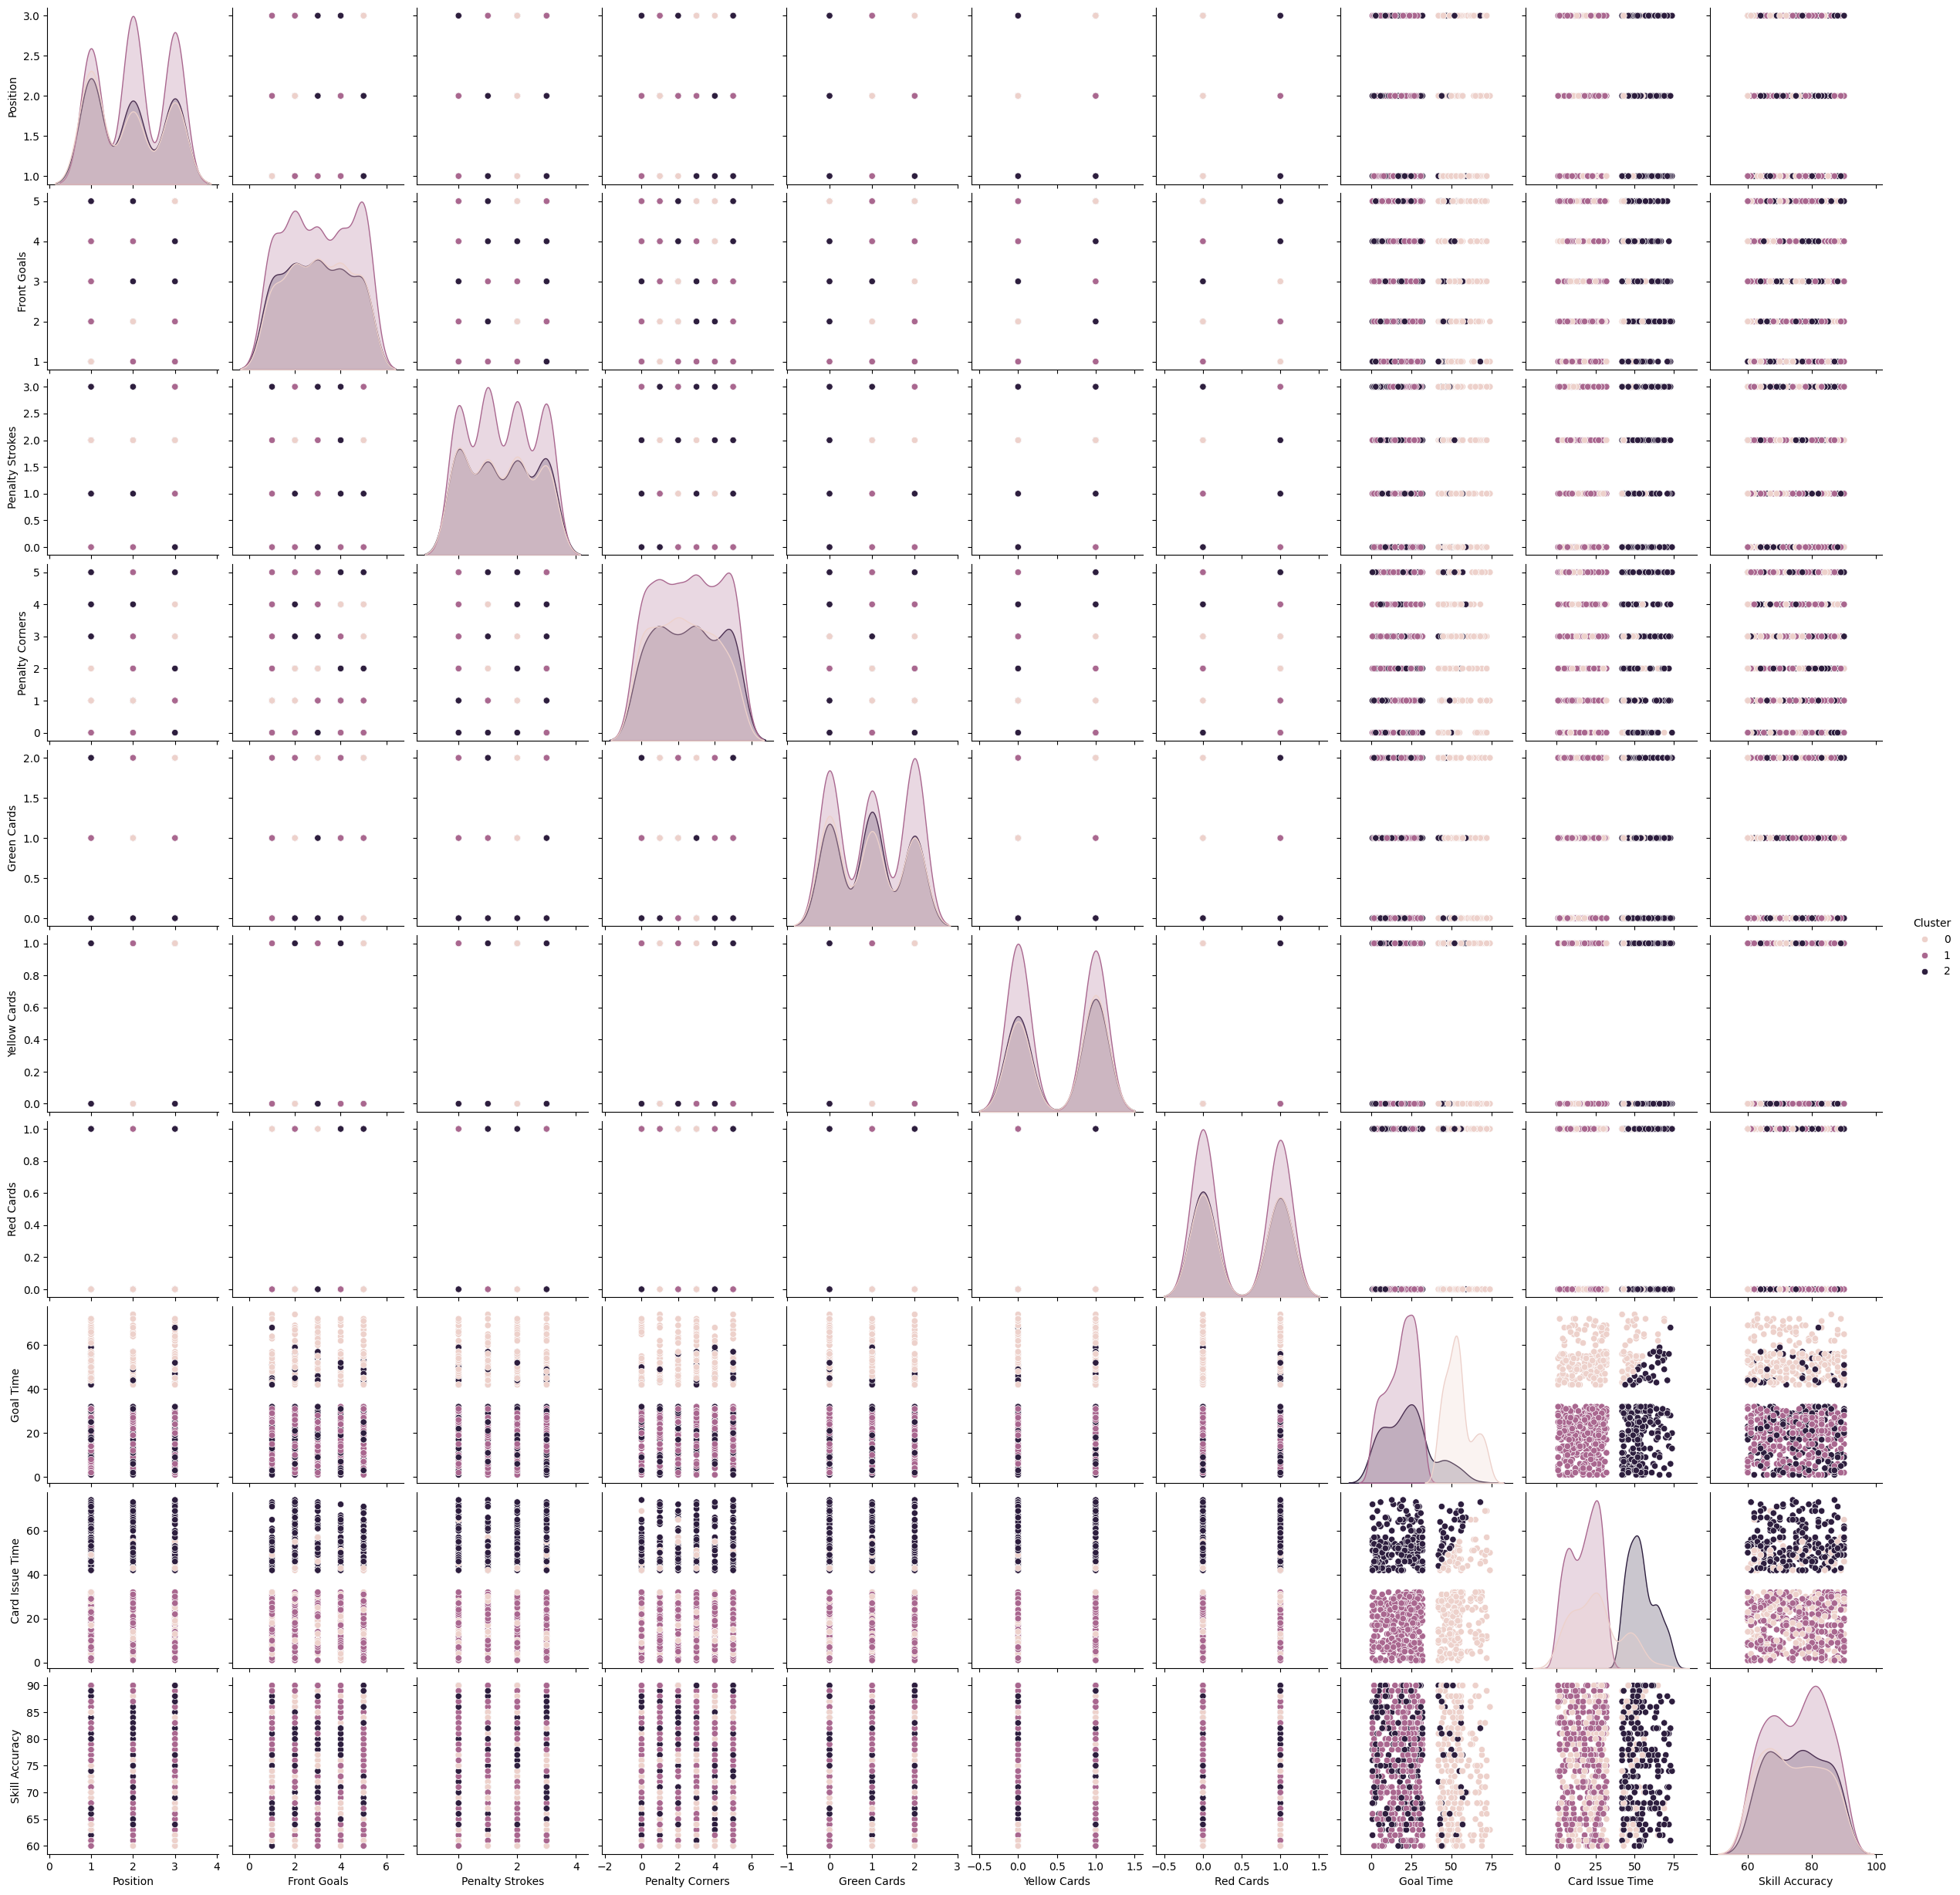

In [ ]:
from sklearn.cluster import KMeans

# Perform cluster analysis to identify groups of players with similar performance attributes
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df.drop(['Player ID'], axis=1))

# Add cluster labels to the dataset
df['Cluster'] = clusters

# Visualize clusters using pairplot colored by cluster
sns.pairplot(df.drop(['Player ID'], axis=1), hue='Cluster')
plt.show()
